In [170]:
# Basic Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Additional Packages
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler # Scales data for PCA
from sklearn.decomposition import PCA # PCA package
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold

## Import Data and Explore

In [9]:
df = pd.read_excel("data.xlsx")

In [10]:
df.columns

Index(['subject', 'age', 'label', 'RBC2barrier', 'Inflation', 'bandwidth',
       'ven_defect', 'ven_low', 'ven_high', 'ven_SNR', 'ven_mean',
       'ven_median', 'ven_SD', 'bar_defect', 'bar_low', 'bar_high', 'bar_SNR',
       'bar_mean', 'bar_median', 'bar_SD', 'bar_negative', 'rbc_defect',
       'rbc_low', 'rbc_high', 'rbc_SNR', 'rbc_mean', 'rbc_median', 'rbc_SD',
       'rbc_negative', 'fvc', 'fe1', 'fev1-fvc', 'fev25-75'],
      dtype='object')

In [11]:
df['label'].value_counts()

IPF     71
NSIP    36
Name: label, dtype: int64

In [12]:
df = df.dropna(subset = ['label'])
df.isna().mean().round(4) * 100

subject           0.00
age             100.00
label             0.00
RBC2barrier      16.82
Inflation        16.82
bandwidth        16.82
ven_defect       16.82
ven_low          16.82
ven_high         16.82
ven_SNR          16.82
ven_mean         16.82
ven_median       16.82
ven_SD           16.82
bar_defect       16.82
bar_low          16.82
bar_high         16.82
bar_SNR          16.82
bar_mean         16.82
bar_median       16.82
bar_SD           16.82
bar_negative     16.82
rbc_defect       16.82
rbc_low          16.82
rbc_high         16.82
rbc_SNR          16.82
rbc_mean         16.82
rbc_median       16.82
rbc_SD           16.82
rbc_negative     16.82
fvc              20.56
fe1              20.56
fev1-fvc         20.56
fev25-75         22.43
dtype: float64

In [13]:
df.drop(columns = ['age'], inplace = True)

## Imputation of Missing Data

In [14]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy = 'most_frequent')
imp_mean.fit(df)
total_df = pd.DataFrame(imp_mean.transform(df))
total_df.columns = df.columns
total_df

,subject,label,RBC2barrier,Inflation,bandwidth,ven_defect,ven_low,ven_high,ven_SNR,ven_mean,...,rbc_high,rbc_SNR,rbc_mean,rbc_median,rbc_SD,rbc_negative,fvc,fe1,fev1-fvc,fev25-75
0,002-034,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
1,002-044,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
2,002-046,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
3,002-047,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
4,002-050,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,002-161,NSIP,0.166875,2.35788,797.194,0.0269987,0.142228,0.14175,8.6541,0.605112,...,0.0336642,1.7273,0.239186,0.206631,0.223102,0.1889,52,53,103,71
103,002-163,NSIP,0.165095,3.04086,797.194,0.107052,0.25219,0.115944,21.0494,0.511014,...,0.00169605,4.44014,0.178011,0.168353,0.116568,0.0622522,75,76,100,70
104,002-164,NSIP,0.189125,2.78094,797.194,0.0862103,0.246538,0.0965257,15.9978,0.514989,...,0.00387376,3.10894,0.185587,0.16533,0.142729,0.0991484,81,92,113,161
105,002-165,NSIP,0.22962,3.54611,797.194,0.142049,0.483274,0.0221517,5.04411,0.374598,...,0.0411277,0.923032,0.233056,0.167561,0.387257,0.216852,38,44,114,84


In [15]:
total_df['label'] = pd.Categorical(total_df['label'])
total_df['code_label'] = total_df.label.cat.codes # add column for binary numeric label 
total_df.dtypes

subject           object
label           category
RBC2barrier       object
Inflation         object
bandwidth         object
ven_defect        object
ven_low           object
ven_high          object
ven_SNR           object
ven_mean          object
ven_median        object
ven_SD            object
bar_defect        object
bar_low           object
bar_high          object
bar_SNR           object
bar_mean          object
bar_median        object
bar_SD            object
bar_negative      object
rbc_defect        object
rbc_low           object
rbc_high          object
rbc_SNR           object
rbc_mean          object
rbc_median        object
rbc_SD            object
rbc_negative      object
fvc               object
fe1               object
fev1-fvc          object
fev25-75          object
code_label          int8
dtype: object

### PCA 

In [16]:
features = total_df.columns.get_values()
features = features[2:-1]
features

/home/peppermint/.virtualenvs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


array(['RBC2barrier', 'Inflation', 'bandwidth', 'ven_defect', 'ven_low',
       'ven_high', 'ven_SNR', 'ven_mean', 'ven_median', 'ven_SD',
       'bar_defect', 'bar_low', 'bar_high', 'bar_SNR', 'bar_mean',
       'bar_median', 'bar_SD', 'bar_negative', 'rbc_defect', 'rbc_low',
       'rbc_high', 'rbc_SNR', 'rbc_mean', 'rbc_median', 'rbc_SD',
       'rbc_negative', 'fvc', 'fe1', 'fev1-fvc', 'fev25-75'], dtype=object)

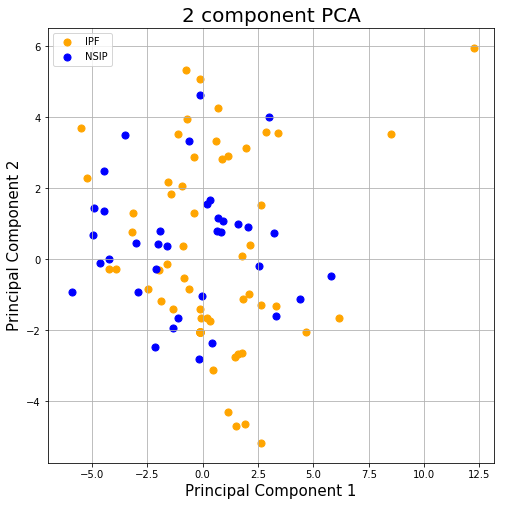

In [17]:

# Separating out the features
x = total_df.loc[:, features].values

# Separating out the target label
y = total_df.loc[:,['label']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, total_df[['label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['IPF', 'NSIP']
colors = ['orange', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

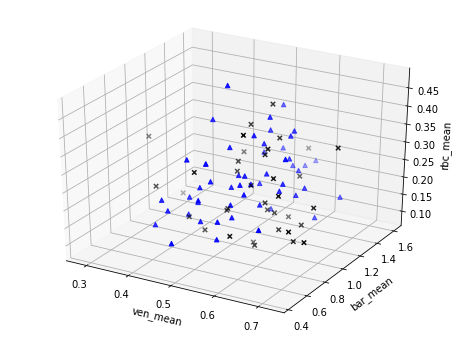

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

c= df[df['label']=='IPF'];
n= df[df['label']=='NSIP'];

ax.scatter(c['ven_mean'], c['bar_mean'], c['rbc_mean'], c='b', marker='^')
ax.scatter(n['ven_mean'], n['bar_mean'], n['rbc_mean'], c='k', marker='x')

ax.set_xlabel('ven_mean')
ax.set_ylabel('bar_mean')
ax.set_zlabel('rbc_mean')

plt.show()

In [45]:
"""
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(h['ven_mean'], h['bar_mean'], c='r', marker='o')
ax.scatter(c['ven_mean'], c['bar_mean'], c='b', marker='^')
ax.scatter(n['ven_mean'], n['bar_mean'], c='k', marker='x')

ax.set_xlabel('ven_mean')
ax.set_ylabel('bar_mean')
"""

"\nfig = plt.figure(figsize=(8, 6))\nax = fig.add_subplot(111)\n\nax.scatter(h['ven_mean'], h['bar_mean'], c='r', marker='o')\nax.scatter(c['ven_mean'], c['bar_mean'], c='b', marker='^')\nax.scatter(n['ven_mean'], n['bar_mean'], c='k', marker='x')\n\nax.set_xlabel('ven_mean')\nax.set_ylabel('bar_mean')\n"

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(h['bar_mean'], h['rbc_mean'], c='r', marker='o')
ax.scatter(c['bar_mean'], c['rbc_mean'], c='b', marker='^')
ax.scatter(n['bar_mean'], n['rbc_mean'], c='k', marker='x')

ax.set_xlabel('bar_mean')
ax.set_ylabel('rbc_mean')

In [44]:
# Maximum number of components min(features, observations-1)

max_num_PCA=min(len(features),len(total_df.index))
max_num_PCA

30

In [50]:
### Just copy Peter code cause too lazy and why not


# Separating out the features
x = total_df.loc[:, features].values

# Separating out the target label
y = total_df.loc[:,['label']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=max_num_PCA)
principalComponents = pca.fit(x)

Text(0.5, 1.0, 'Scree Plot')

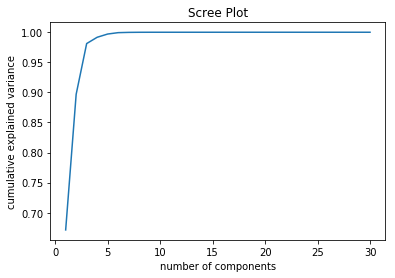

In [158]:
# ref : https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

plt.plot(range(1,max_num_PCA+1),np.cumsum(principalComponents.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Plot')


In [69]:
# find number of component that explain 90% 
# the code refer to https://stackoverflow.com/questions/9706041/finding-index-of-an-item-closest-to-the-value-in-a-list-thats-not-entirely-sort

cumsum=np.cumsum(principalComponents.explained_variance_ratio_)

# Plus one because index in python start with 0
min_number=min(range(len(cumsum)), key=lambda i: abs(cumsum[i]-0.9))+1
min_number

8

## Classical Machine Learning

### SVM

In [28]:
svm_data=total_df.drop(['subject','label'], axis=1)

In [182]:
X = svm_data.drop('code_label', axis=1).values
y = svm_data['code_label'].values

In [183]:
svm_data['code_label'].value_counts()

0    71
1    36
Name: code_label, dtype: int64

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [185]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [186]:
y_pred = svclassifier.predict(X_test)

In [187]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  1]
 [ 8  0]]
              precision    recall  f1-score   support

           0       0.62      0.93      0.74        14
           1       0.00      0.00      0.00         8

    accuracy                           0.59        22
   macro avg       0.31      0.46      0.37        22
weighted avg       0.39      0.59      0.47        22



Ref
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [188]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
X = svm_data.drop('code_label', axis=1).values
y = svm_data['code_label'].values

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [191]:
pca = PCA(n_components=max_num_PCA)
principalComponents = pca.fit(X_train)

In [192]:
X_train_all = principalComponents.transform(X_train)
X_test_all = principalComponents.transform(X_test)

In [193]:
accuracys=[];

for number_comp in range(max_num_PCA):
    X_train = X_train_all[:,:number_comp+1]
    X_test = X_test_all[:,:number_comp+1]
    svclassifier = SVC(kernel='rbf')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    accuracys.append(accuracy_score(y_test, y_pred))



Text(0, 0.5, 'accuracy')

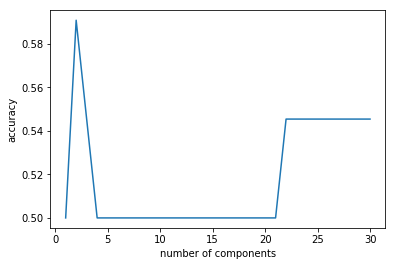

In [194]:
plt.plot(range(1,max_num_PCA+1),accuracys)
plt.xlabel('number of components')
plt.ylabel('accuracy')

In [195]:
print('We achieve the maximum accuracy at '+str(round(max(accuracys)*100,2))+'% when using '+str(np.argmax(accuracys)+1)+' number of components')

We achieve the maximum accuracy at 59.09% when using 2 number of components


In [196]:
## However, since the test set is very small it is subjected to resample error so we will do K fold cross 
## validation it is only 22 that is so small
X_test.shape

(22, 30)

In [205]:
# Ref https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# Easier way to do if we not use PCA is cross_val_score(clf, X, y, cv=5) but we need to split X first we cannot
# do this way

accuracys=[];

kf = KFold(n_splits=5)

for number_comp in range(max_num_PCA):
    accuracy_k=[];
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        pca = PCA(n_components=number_comp+1)
        principalComponents = pca.fit(X_train)
        
        X_train = principalComponents.transform(X_train)
        X_test = principalComponents.transform(X_test)
        
        svclassifier = SVC(kernel='rbf')
        svclassifier.fit(X_train, y_train)
        y_pred = svclassifier.predict(X_test)
        accuracy_k.append(accuracy_score(y_test, y_pred))
    accuracys.append(np.mean(accuracy_k))



Text(0, 0.5, 'accuracy')

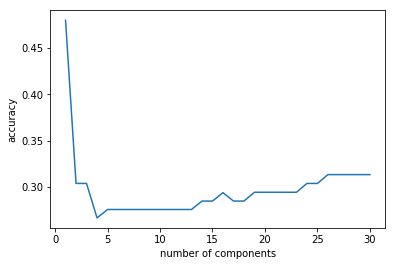

In [206]:
plt.plot(range(1,max_num_PCA+1),accuracys)
plt.xlabel('number of components')
plt.ylabel('accuracy')

In [207]:
print('We achieve the maximum accuracy at '+str(round(max(accuracys)*100,2))+'% when using '+str(np.argmax(accuracys)+1)+' number of components')

We achieve the maximum accuracy at 48.01% when using 1 number of components
